<a href="https://colab.research.google.com/github/luciaPi/Girls_day/blob/main/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikácia Fashion-MNIST pomocou Konvolučnej neurónovej siete v Pythone

Knižnica: Tensorflow

![Fashion MNIST](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Dataset = vstupy + výstupy

![Dataset](https://drive.google.com/uc?id=1emGQXUM5iBTpq4gakgFsdYD5FX10yHSu)

## Fashion-MNIST dataset

*   28x28 čiernobiele obrázky
*   70 000 obrázkov (60 000 tréning, 10 000 test)
*   10 kategórií

<br> **Kategórie**

![Labels](https://drive.google.com/uc?id=1g14-UZkDVOaSkDlDX_ead1cNZ79M25xV)


## Stiahnutie fashion_mnist datasetu

**Dataset**
* x - vstup (obrázok)
* y - výstup (kategória)

In [1]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Vizualizovanie dát

In [3]:
# Print the number of training and test datasets
print('Train set:', x_train.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

Train set: 60000 images
Test set: 10000 images


Image index: 5  Label: 2 Pullover


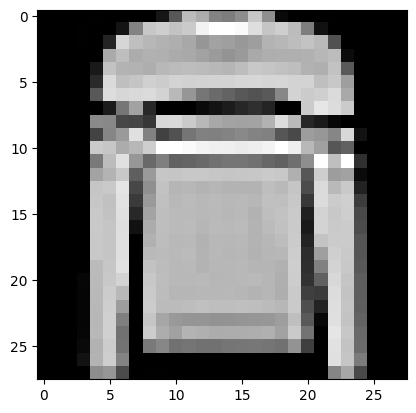

In [8]:
# Image index (number between 0 and 59 999)
img_index = 5

# y_train contains the lables (categories from 0 to 9)
label_index = y_train[img_index]
print('Image index:', img_index, ' Label:', label_index, fashion_mnist_labels[label_index])
plt.imshow(x_train[img_index], cmap='gray')

## Normalizácia dát
Dáta musia mať rozsah hodnôt od 0 do 1.

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Rozdelenie datasetu

*   Trénovacie dáta - tréning modelu
*   Validačné dáta - tuning parametrov modelu
*   Testovacie dáta - záverečné testovanie modelu

<img src="https://drive.google.com/uc?id=1njcCdtmdC7YXoYWMx-PtaZM4Eo0zs5ul" alt="Dataset" width=70%>

In [10]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('Train set:', x_train.shape[0], 'images')
print('Validation set:', x_valid.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Train set: 55000 images
Validation set: 5000 images
Test set: 10000 images


## Vytvorenie modelu

<img src="https://drive.google.com/uc?id=1rhtONHuZP2tF6ECEJtAzMy4lmAkozZ42" alt="Dataset" width=90%>

Vrstvy konvolučnej neurónovej siete: 
*   Conv2D - konvolučná vrstva 
*   Pooling - zmenšuje rozmer 
*   Dropout - pridáva náhodnosť 

Vrstvy neurónovej siete: 
*   Flatten - z 2D do 1D
*   Dense - klasická vrstva

In [11]:
model = tf.keras.Sequential()

# Convolutional neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Neural network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

<img src="https://drive.google.com/uc?id=1yBd-KJFwc6QLW9C4dDmR-E-UnAboutmM" alt="Dataset" width=70%>

## Kompilácia modelu



In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

## Tréning modelu

Priebežne sa ukladá model na základe presnosti na validačnej množine. (checkpoint)

<img src="https://drive.google.com/uc?id=1-7oNniPjh4V6M5JaaYof9Hbf24ZiR7YZ" alt="Dataset" width=40%>


In [14]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(x_train, # training data - input(images)
         y_train, # training data - output(categories)
         batch_size=64,
         epochs=10, # training repetitions
         validation_data=(x_valid, y_valid), # validation set - input,output
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.7795
Epoch 1: val_loss improved from inf to 0.37108, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 8ms/step - loss: 0.6010 - accuracy: 0.7795 - val_loss: 0.3711 - val_accuracy: 0.8684
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.8500
Epoch 2: val_loss improved from 0.37108 to 0.32151, saving model to model.weights.best.hdf5
860/860 [==============================] - 5s 6ms/step - loss: 0.4120 - accuracy: 0.8500 - val_loss: 0.3215 - val_accuracy: 0.8850
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8668
Epoch 3: val_loss improved from 0.32151 to 0.28909, saving model to model.weights.best.hdf5
860/860 [==============================] - 5s 5ms/step - loss: 0.3683 - accuracy: 0.8668 - val_loss: 0.2891 - val_accuracy: 0.8946
Epoch 4/10
849/860 [===========================

## Testovanie modelu

Presnosť na testovacích dátach.

In [35]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
percentage = "{:.2%}".format(score[1])
print("Test accuracy:",percentage)

313/313 [==============================] - 1s 4ms/step - loss: 0.2488 - accuracy: 0.9092
Test accuracy: 90.92%


## Vizualizovanie výsledkov

Použitie natrénovaného modelu.

Predikcia kategórie na testovacom datasete.

Predicted category: 2 Pullover
Real category: 2 Pullover


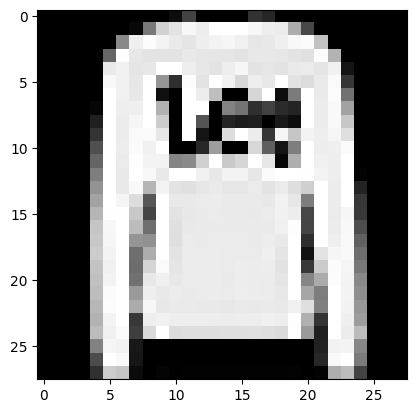

In [41]:
index = 1
first_img = tf.expand_dims(x_test[index], axis=0)
plt.imshow(first_img[0], cmap='gray')

prediction = model.predict(first_img, verbose=0)
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])
real_index = np.argmax(y_test[index])
print('Real category:', real_index, fashion_mnist_labels[real_index])

10 náhodných obrázkov z testovacej množiny.

Predikovaná kategória:
* zelená - správne
* červená - nesprávne

313/313 [==============================] - 1s 3ms/step


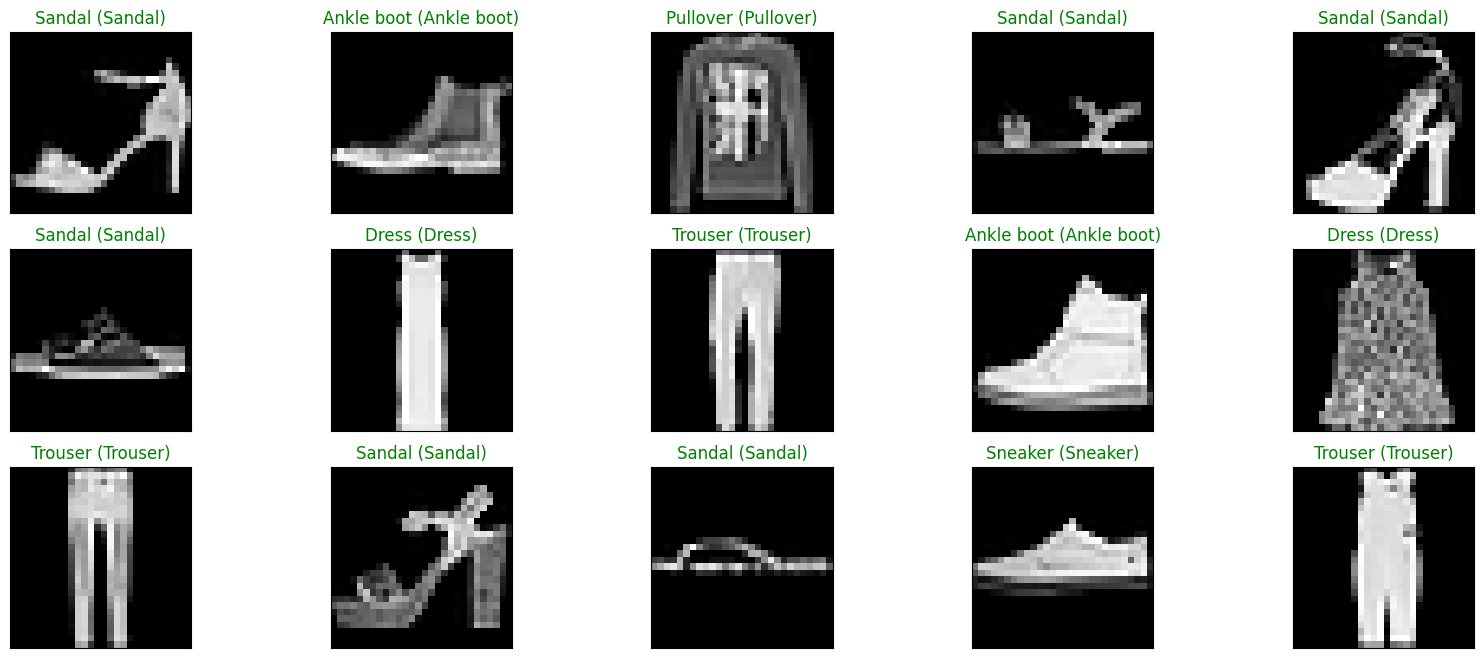

In [42]:
y_hat = model.predict(x_test)

# 10 random test images
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Reálny obrázok

Predicted category: 8 Bag


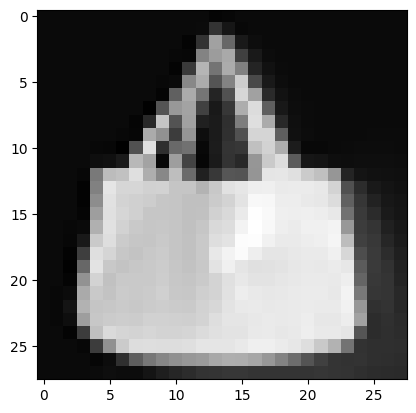

In [44]:
from PIL import Image

new_img = Image.open('bag.jpg').convert('L')
new_img = np.array(new_img.resize((28, 28)))  # resize image to 28x28
new_img = new_img.astype('float32') / 255
new_img = 1-new_img  # invert colors
new_img = tf.expand_dims(new_img, axis=0)
new_img = tf.expand_dims(new_img, axis=3)
plt.imshow(new_img[0], cmap='gray')

prediction = model.predict(new_img, verbose=0)
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])